# Canary regular
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [10]:
!./get_logs.sh 172.18.6.50 300000
!./parse_logs.sh
!ls ../data/

metric.csv  safirortb.log


In [11]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 4.30000000e+02, 2.70000000e+01, ...,
        9.12000000e-02, 4.00000000e+00, 6.00000000e+00],
       [2.01812112e+13, 5.81000000e+02, 2.73000000e+02, ...,
        8.35000000e-02, 1.00000000e+00, 8.00000000e+00],
       [2.01812112e+13, 5.85000000e+02, 2.85000000e+02, ...,
        5.44000000e-02, 1.00000000e+00, 3.00000000e+00],
       ...,
       [2.01812112e+13, 4.63000000e+02, 1.52000000e+02, ...,
        6.41000000e-02, 1.00000000e+00, 9.00000000e+00],
       [2.01812112e+13, 4.80000000e+02, 2.65000000e+02, ...,
        8.54000000e-02, 2.00000000e+00, 1.10000000e+01],
       [2.01812112e+13, 4.86000000e+02, 2.61000000e+02, ...,
        8.78000000e-02, 2.00000000e+00, 1.10000000e+01]])

In [12]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(475.4717685487634, 72.27798659187762)

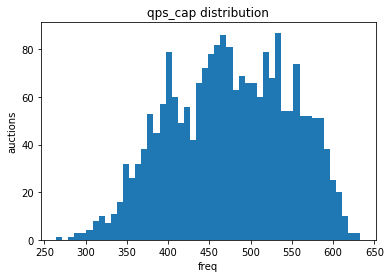

In [4]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(203.3574428371442, 79.44230540109797)

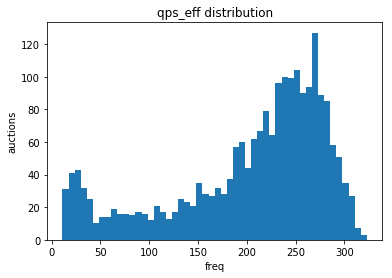

In [5]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(0.002154176388240784, 0.0003520224357889154)

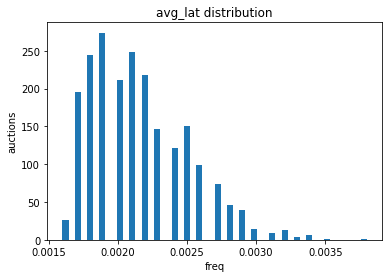

In [6]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(7.3924405039664025, 2.997662609123222)

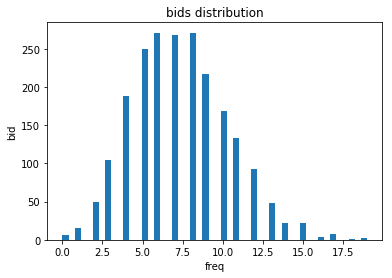

In [7]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),math.sqrt(fn.var())

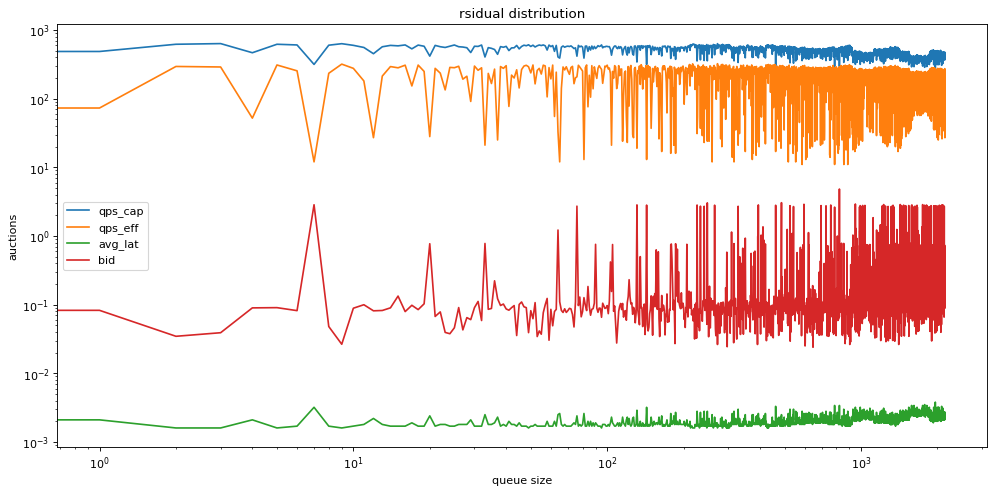

In [8]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()